# 16-17 Marzo


azimuth 305

azimuth vero 300

ora inizio 23:00

ora fine 1:52
    


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MinuteLocator, SecondLocator, DateFormatter
import pandas as pd

In [16]:
azimuth_min =  304.8
azimuth_max =  305.2

data_i = pd.to_datetime('2023-03-16 23:50:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-03-17 01:52:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-03-17 02:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '16/17 marzo 2023, azimuth: 300'

file_parabola1 = '../../Dati/16-17 marzo/2023_03_16.txt'
file_parabola2 = '../../Dati/16-17 marzo/2023_03_17.txt'
file_ricevitore = '../../Dati/16-17 marzo/2023-03-16.txt'

In [17]:
data1 = pd.read_csv(file_parabola1, sep=';', header=None)
data2 = pd.read_csv(file_parabola2, sep=';', header=None)

In [18]:
parabola = data1.append(data2)

In [19]:
parabola

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,16,3,2023,0,0,2,3,1,1,288.5,...,NaN,NaN,NaN,NaN,NaN,NaN,-45.6,-45.6,-45.6,-45.6
1,16,3,2023,0,0,5,3,1,1,288.5,...,NaN,NaN,NaN,NaN,NaN,NaN,-45.6,-45.6,-45.6,-45.6
2,16,3,2023,0,0,8,3,1,1,288.5,...,NaN,NaN,NaN,NaN,NaN,NaN,-45.6,-45.6,-45.6,-45.6
3,16,3,2023,0,0,11,3,1,1,288.5,...,NaN,NaN,NaN,NaN,NaN,NaN,-45.6,-45.6,-45.6,-45.6
4,16,3,2023,0,0,14,3,1,1,288.5,...,NaN,NaN,NaN,NaN,NaN,NaN,-45.6,-45.6,-45.6,-45.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,17,3,2023,23,59,47,3,1,1,310.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-45.6,-45.6,-45.6,-45.6
28796,17,3,2023,23,59,50,3,1,1,310.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-45.6,-45.6,-45.6,-45.6
28797,17,3,2023,23,59,53,3,1,1,310.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-45.6,-45.6,-45.6,-45.6
28798,17,3,2023,23,59,56,3,1,1,310.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-45.6,-45.6,-45.6,-45.6


In [20]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

In [21]:
ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [22]:
mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

In [23]:
while parabola.at[0,'elevazione'] > 20.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)

In [24]:
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

In [25]:
delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

In [26]:
with open('parabola.txt', 'w') as f: 
    f.write(parabola.to_string(index=False))

with open('ricevitore.txt', 'w') as f: 
    f.write(ricevitore_10.to_string(index=False))

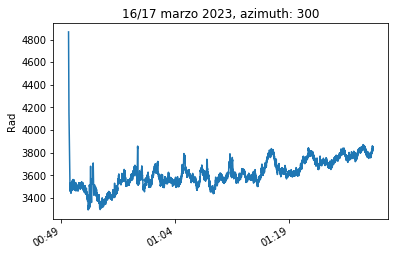

In [27]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))

plt.title(title)
plt.ylabel('Rad')
plt.show()